In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif' 
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (15,5)

In [3]:
# Dimensions are ACTIVE, not fiducial

detLength = 1037/100. # in m
detHeight = 233/100. # in m
detWidth = 256/100. # in m
targDetDistance = 470 - (detLength) 

area = detHeight*detWidth
radius = np.sqrt(area/(2*np.pi))

def ThetaMax(x):
    thetaMax = np.arccos( (targDetDistance-x) / np.sqrt((targDetDistance-x)**2 + (radius)**2) )
    thetaMax = np.degrees(thetaMax)
    return thetaMax

def ProjectionFunction(x,theta):
    ret = np.where(abs(theta) >= ThetaMax(x), 0, 1)
    return ret

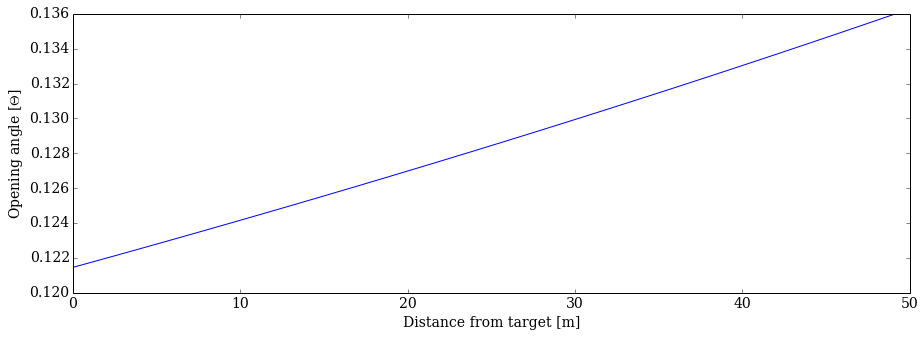

In [4]:
l = np.arange(50)
xlab = 'Distance from target [m]'
ylab = r'Opening angle [$\Theta$]'

plt.figure(figsize=figsize)
plt.plot(l,ThetaMax(l))
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.show()

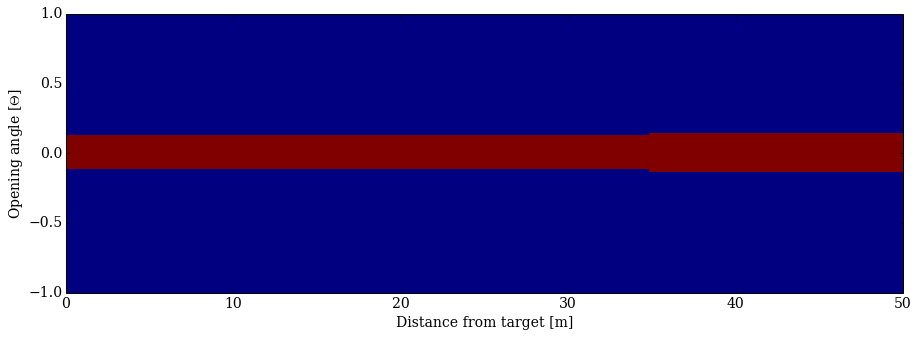

In [7]:
l = np.linspace(0,50,100)
theta = np.linspace(-1,1,100)
l, theta = np.meshgrid(l,theta)

plt.figure(figsize=figsize)
plt.pcolormesh(l,theta,ProjectionFunction(l,theta))
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.show()